In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
df_proc = pd.read_csv('files/procedures_icd.csv', dtype={'ROW_ID':int,'SUBJECT_ID':int,'HADM_ID':int,'SEQ_NUM':int,'ICD9_CODE':str})
#df_proc = pd.read_csv('procedures_icd.csv')
#df_proc.info()
df_proc['ICD9_CODE'].nunique()
#df_proc.head(621)

2032

In [19]:

df_proc['ICD9_CODE'] = df_proc['ICD9_CODE'].str.slice(start=0, stop=2, step=1)
df_proc['ICD9_CODE'] = df_proc['ICD9_CODE'].astype(int)
df_proc.head(621)


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,944,62641,154460,3,34
1,945,2592,130856,1,96
2,946,2592,130856,2,38
3,947,55357,119355,1,96
4,948,55357,119355,2,3
...,...,...,...,...,...
616,195,7260,164742,1,3
617,196,7260,164742,2,38
618,197,7260,164742,3,3
619,198,7260,164742,4,96


In [20]:
icd9_ranges = [(1, 6), (6, 8), (8, 18), (18, 21), (21, 30), (30, 35), 
               (35, 40), (40, 42), (42, 55), (55, 60), (60, 72),
               (72, 76), (76, 85), (85, 87), (87, 100)]

# Associated category names
proc_list = ['p_nervous','p_endocrine','p_eye','p_ear',
            'p_nose & mouth', 'p_respiratory', 'p_cardiovascular', 'p_hemic & lymphatic',
             'p_digestive','p_urinary', 'p_genital', 'p_obstetrical', 
             'p_musculoskeletal', 'p_integumentary','p_misc']

for num, cat_range in enumerate(icd9_ranges):
    df_proc['ICD9_CODE'] = np.where(df_proc['ICD9_CODE'].between(cat_range[0],cat_range[1]), num, df_proc['ICD9_CODE'])
    #df_diagcode['cat'] = diag_list[num]
for i in range (len(df_proc['ICD9_CODE'])):
    df_proc['ICD9_CODE'][i] = proc_list[df_proc['ICD9_CODE'][i]]

#df_proc.to_csv('merge_proc.csv',index=False)
df_proc.head(30)

C:\Users\gavry\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,944,62641,154460,3,p_respiratory
1,945,2592,130856,1,p_misc
2,946,2592,130856,2,p_cardiovascular
3,947,55357,119355,1,p_misc
4,948,55357,119355,2,p_nervous
5,949,55357,119355,3,p_cardiovascular
6,950,9545,158060,1,p_nervous
7,951,28600,189217,1,p_cardiovascular
8,952,28600,189217,2,p_cardiovascular
9,953,28600,189217,3,p_cardiovascular


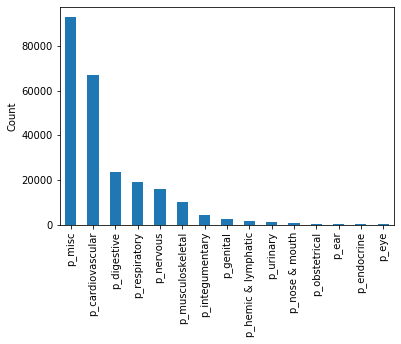

In [21]:
plt.ylabel('Count')
#plt.title('Distribution of LOS')
df_proc['ICD9_CODE'].value_counts().plot(kind="bar")

In [22]:
#df_group = df_proc.groupby('HADM_ID')
#df_cat = df_group.agg({
#    'ICD9_CODE': 'nunique'
#}).reset_index()

#df_cat.columns = ['HADM_ID','no_Procedures']
hadm_list = df_proc.groupby('HADM_ID')['ICD9_CODE'].apply(list).reset_index()
hadm_item = pd.get_dummies(hadm_list['ICD9_CODE'].apply(pd.Series).stack()).sum(level=0)
df_cat = hadm_item.join(hadm_list['HADM_ID'], how="outer")
df_cat

,p_cardiovascular,p_digestive,p_ear,p_endocrine,p_eye,p_genital,p_hemic & lymphatic,p_integumentary,p_misc,p_musculoskeletal,p_nervous,p_nose & mouth,p_obstetrical,p_respiratory,p_urinary,HADM_ID
0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,100003
1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,100006
2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,100007
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100009
4,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,100010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52238,4,0,0,0,0,0,0,0,6,0,0,0,0,3,0,199993
52239,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,199994
52240,3,0,0,0,0,0,0,0,4,0,0,0,0,2,0,199995
52241,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199998


In [23]:
#df_cat['proc_nervous'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='nervous'))
#df_cat['proc_endocrine'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='endocrine'))
#df_cat['proc_eye'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='eye'))
#df_cat['proc_ear'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='ear'))
#df_cat['proc_nose&mouth'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='nose & mouth'))
#df_cat['proc_respiratory'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='respiratory'))
#df_cat['proc_cardiovascular'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='cardiovascular'))
#df_cat['proc_hemic&lymphatic'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='hemic & lymphatic'))
#df_cat['proc_digestive'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='digestive'))
#df_cat['proc_urinary'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='urinary'))
#df_cat['proc_genital'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='genital'))
#df_cat['proc_obstetrical'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='obstetrical'))
#df_cat['proc_musculoskeletal'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='musculoskeletal'))
#df_cat['proc_integumentary'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='integumentary'))
#df_cat['proc_misc'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='misc'))

df_cat.head(50)

,p_cardiovascular,p_digestive,p_ear,p_endocrine,p_eye,p_genital,p_hemic & lymphatic,p_integumentary,p_misc,p_musculoskeletal,p_nervous,p_nose & mouth,p_obstetrical,p_respiratory,p_urinary,HADM_ID
0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,100003
1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,100006
2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,100007
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100009
4,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,100010
5,2,1,0,0,0,0,0,0,3,3,1,0,0,5,0,100011
6,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,100012
7,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,100014
8,1,0,0,0,0,0,0,0,2,0,0,0,0,2,0,100016
9,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,100017


In [24]:
df = pd.read_csv('merge_diag_pat.csv')
df = df.merge(df_cat, how='inner', on='HADM_ID')
df.info()
df.to_csv('merge_diag_pat_proc.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46825 entries, 0 to 46824
Data columns (total 50 columns):
SUBJECT_ID             46825 non-null int64
HADM_ID                46825 non-null int64
ADMITTIME              46825 non-null object
DEATHTIME              0 non-null float64
ADMISSION_TYPE         46825 non-null object
ADMISSION_LOCATION     46825 non-null object
DISCHARGE_LOCATION     46825 non-null object
INSURANCE              46825 non-null object
LANGUAGE               26286 non-null object
RELIGION               46513 non-null object
MARITAL_STATUS         46825 non-null object
ETHNICITY              46825 non-null object
DIAGNOSIS              46810 non-null object
LOS                    46825 non-null float64
d_blood                46825 non-null int64
d_circulatory          46825 non-null int64
d_congenital           46825 non-null int64
d_digestive            46825 non-null int64
d_endocrine            46825 non-null int64
d_genitourinary        46825 non-null int64
d

In [25]:
df_cat.isnull().values.sum()

0

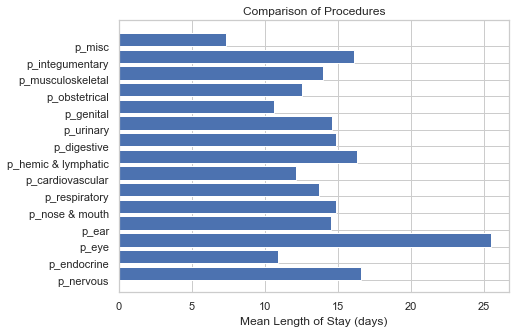

In [27]:
import seaborn as sns
# Look at the median LOS by diagnosis category
proc_list = ['p_nervous','p_endocrine','p_eye','p_ear',
            'p_nose & mouth', 'p_respiratory', 'p_cardiovascular', 'p_hemic & lymphatic',
             'p_digestive','p_urinary', 'p_genital', 'p_obstetrical', 
             'p_musculoskeletal', 'p_integumentary','p_misc']

results = []
for variable in proc_list:
    results.append(df[[variable, 'LOS']].groupby(variable).mean().reset_index().values[1][1])

sns.set(style="whitegrid")
#sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7,5))
ind = range(len(results))
ax.barh(ind, results, align='edge')
ax.set_yticks(ind)
ax.set_yticklabels(proc_list)
ax.set_xlabel('Mean Length of Stay (days)')
ax.tick_params(left=False, right=False, top=False) 
ax.set_title('Comparison of Procedures'.format(variable))
plt.show();